# Titanic Survival Prediction

This is my first notebook in Kaggle. Before starting to analyze Titanic Prediction, I refer to some notebook for Titanic solution. I have studied by making a transcription directly and tried to understand their notebook. I'm jonior majored in Business Administration in Korea. I want to became data scientist, So I will study in Kaggle. Although I can't using English very well, I will try to convey my thought.

This notebook have Three steps for solve this problem(predict to survive):
1. Checking Features by EDA
2. Feature engineering
3. Modeling

This notebook is writed for understading overall data analysis process. First, we will check this analysis's goal, <b>to predict if a passenger survived the of the Titanic or not.<b> While we are working on this process, we have to keep in mind about this goal.

# 1. Checking Features by EDA

## 1.1 Road data set and check features roughly.

In [101]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [102]:
# Road training and test set
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Checking Feature

Before we start to analyze Titanic problem, we have to consider each features in this data set. If we don't work this process, we can't perform to analyze very well. Because we will handle features by combining, deleting, it in Feature engineering stage. 

### Feature description
- PassengerId : PassnegerId 
- Survived : Survival (0 : not survived, 1 : survived)
- Pclass : Ticket class (1 : 1st, 2 : 2nd, 3 : 3rd)
- Name : Passeger's name
- Sex : Passenger's Sex
- Age : Passenger's Age
- SibSp : Passenger's siblings or spouses aboard the Titanic
- Parch : Passenger's parents or chidren aboard the Titanic
- Ticket : Ticket number
- fare : Passenger fare
- Cabin : Cabin number
- Embarked : Port of Embarkation (C : Cherbourg, Q : Queenstown, S : Southampton)

Now we can classify this features by description and type.
### Input Feature

<b>Categorical Feature</b> : Name, Sex, Ticket, Cabin, Embarked

<b>Ordinal Feature</b> : Pclass

<b>Numeric Feature</b> : PassengerId, Age, SibSp, Parch, Fare
    
### Target Feature
- Survived



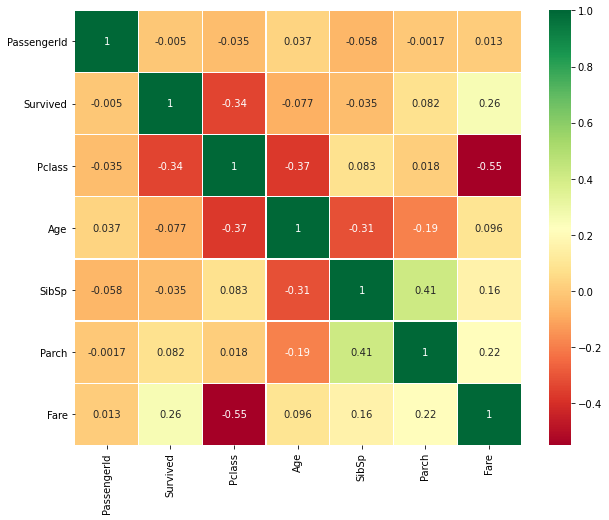

In [104]:
# Correlation matrix
sns.heatmap(train.corr(), annot = True, cmap = 'RdYlGn', linewidth = 0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

#### Correlation Heatmap

We can see feature correlation between numeric features. There are some noticeable correlation between numeric features.
- Fare and Pclass has negative correlation. We can guess because Pclass is higher(1 than 2, 3), then Fare is higher
- Survived and Pclass has negative correlation. We will check this relation by making some plots.
- Age and Pclass has negative correlation. Although Pclass has very negative correlation with Survived, Age has no correlation with Survived in this heatmap. So we also check that later.
- SibSp and Parch has positive correlation. We can guess because there are many families on the Titanic. So We can handle these features.
- Age with SibSp and Parch has negative correlation. 
- Other than that, there are some noticeable correlation between Fare and Survived and Parch and Fare, ect.

We will see that by making some plots.

## 1.2 EDA Features

### 1.2.1 Sex with Survived feature

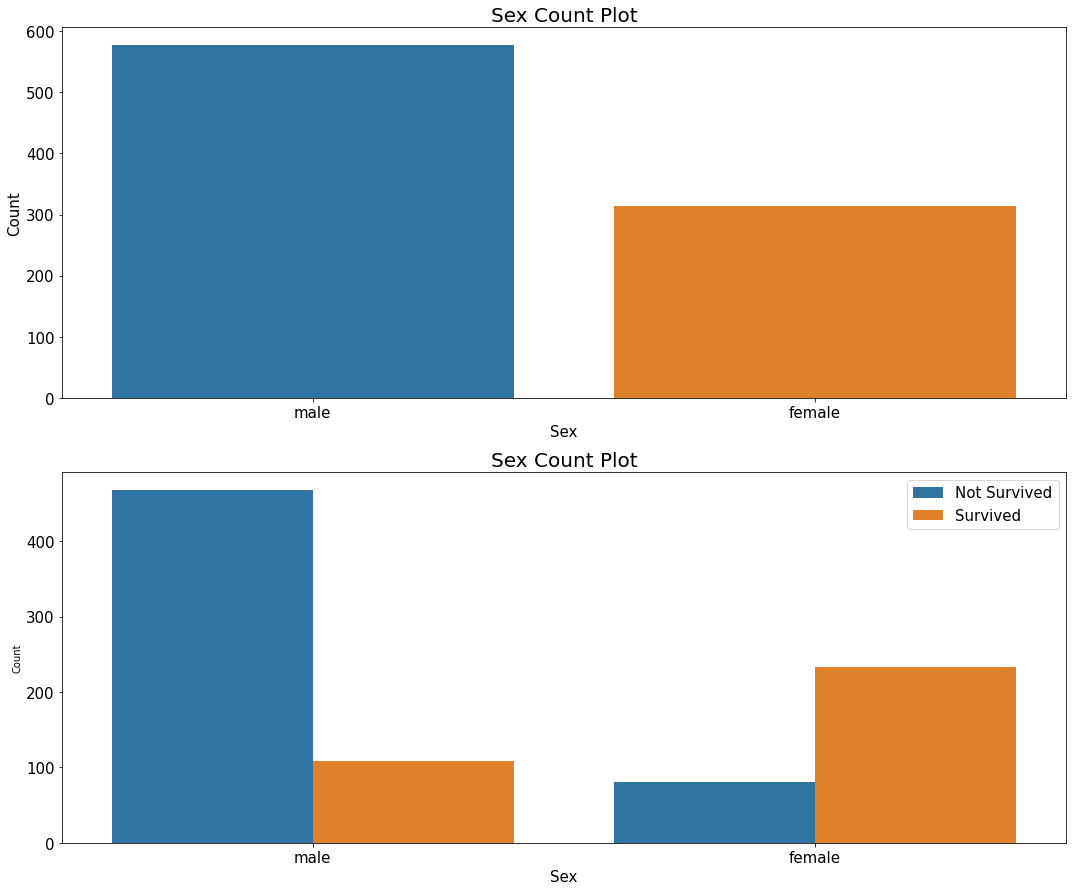

In [105]:
# Count subplots functions for category features
# Count plots a feature's number without Survival and feature's number with Survival

def count_subplots(data, feature1, hue = 'Survived', ylim = None, xlim = None):
    f, ax = plt.subplots(2, figsize = (18, 15))
    sns.countplot(feature1,  data = data, ax = ax[0])
    ax[0].set_title('{} Count Plot'.format(feature1), size = 20)
    ax[0].set_xlabel(feature1, size = 15)
    ax[0].set_ylabel('Count', size = 15)
    ax[0].tick_params(labelsize = 15)
    
    sns.countplot(feature1, hue = hue, data = data, ax = ax[1])
    ax[1].set_title('{} Count Plot'.format(feature1), size = 20)
    ax[1].set_xlabel(feature1, size = 15)
    ax[1].set_ylabel('Count')
    ax[1].tick_params(labelsize = 15)
    if hue == 'Survived':
        ax[1].legend(['Not Survived', 'Survived'], loc = 'upper right', prop = {'size' : 15})
        
    if ylim != None:
        plt.ylim(ylim)
    if xlim != None:
        plt.xlim(xlim)    
    
    plt.show()

count_subplots(train, 'Sex')

We can see that male's survival rate is lower than female's. Although number of male is about twice than number of female on the Titanic. However number of survived female is about twice than number of survived male. 

<b>So we can see that Sex feature is important feature to predict survival</b>

### 1.2.2 Pclass with Survived feature

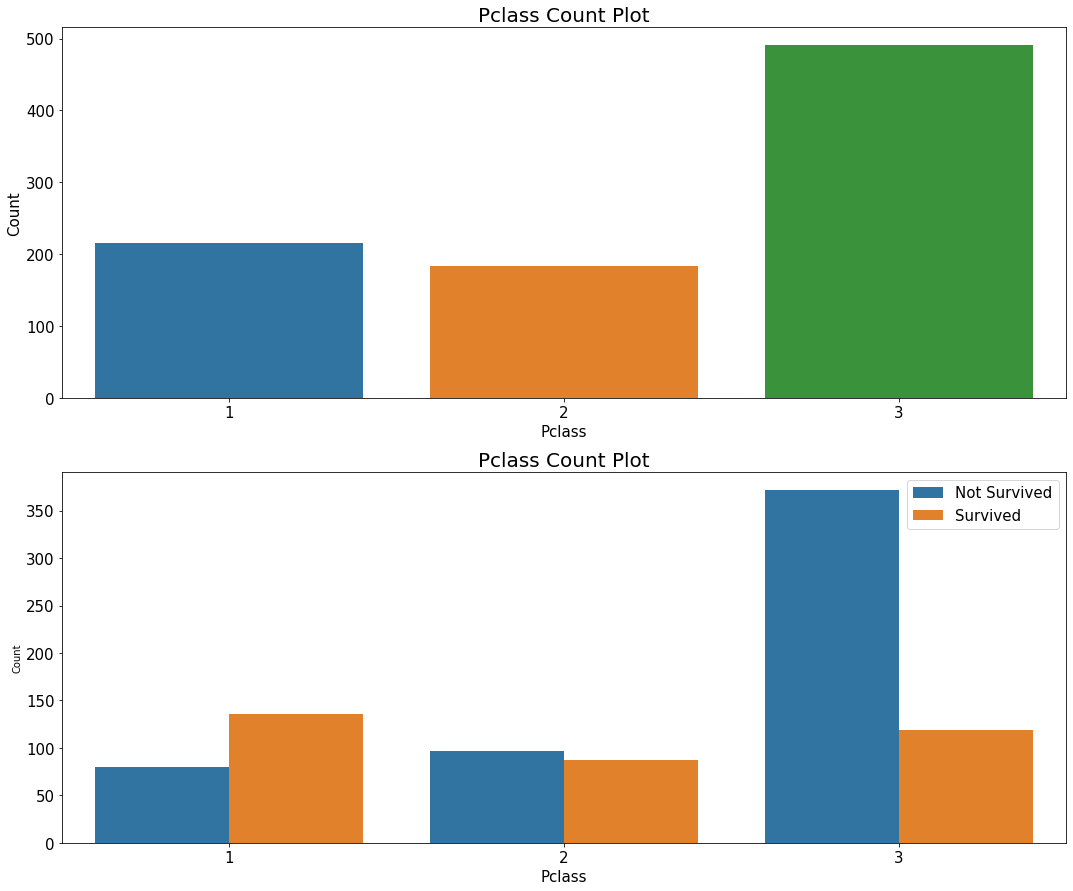

In [106]:
count_subplots(train, 'Pclass')

We can see that number of 3rd class's passengers is half of passenger on the Titanic. Also almost of them account for not surviving. On the other hand, more than half of 1st class's passengers is survived.

<b>It shows that Pclass feature is also important features in this practice.</b>

### 1.2.3 SibSp and Parch with Survived feature

SibSp Count Plot
----------------------------------------------------------------------------------------------------



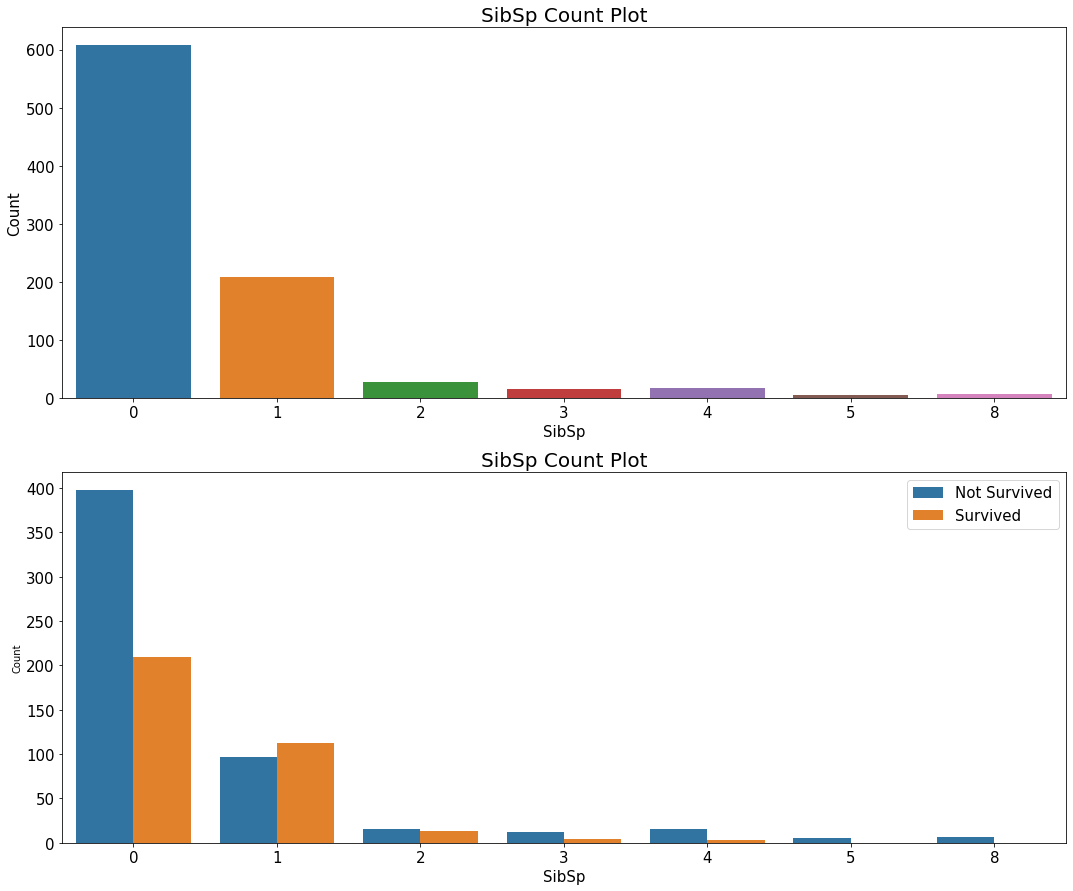

Parch Count Plot
----------------------------------------------------------------------------------------------------



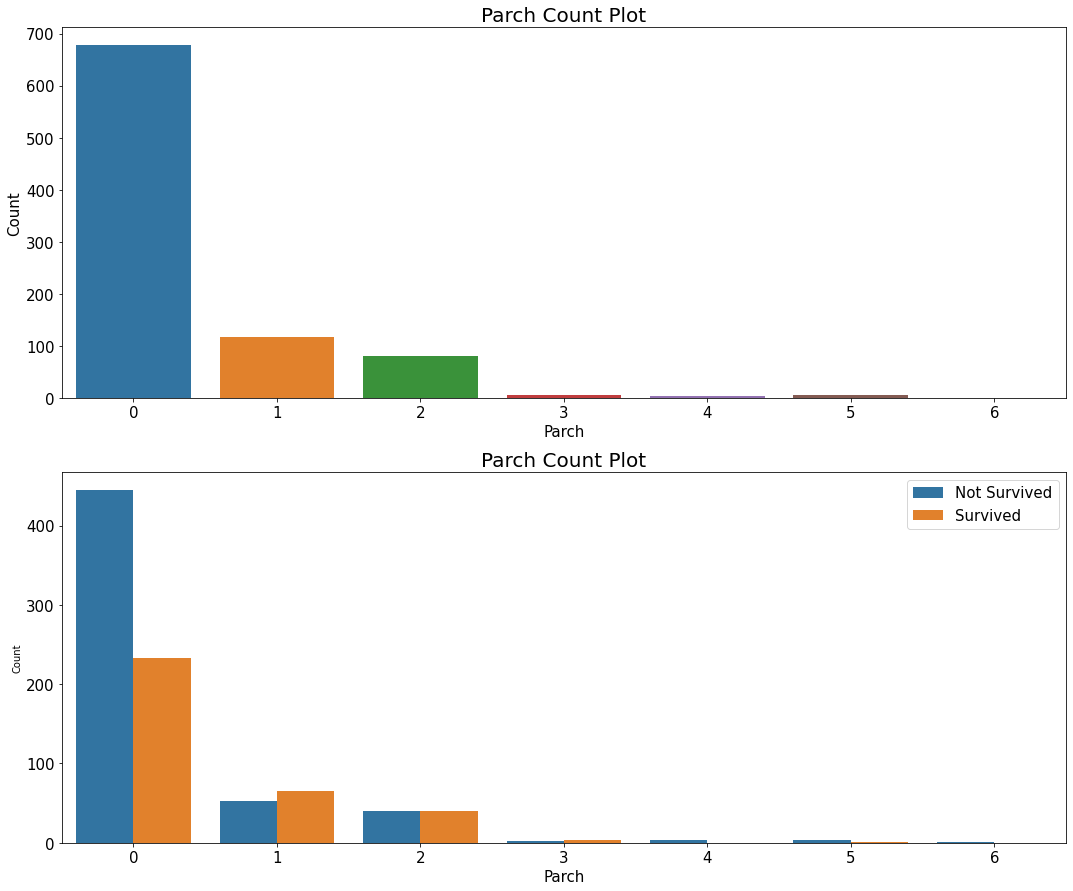

In [107]:
print('SibSp Count Plot', end = '\n{}\n\n'.format('-'*100))
count_subplots(train, 'SibSp')
print('Parch Count Plot', end = '\n{}\n\n'.format('-'*100))
count_subplots(train, 'Parch')

We can see that shape of plot between SibSp and Survived is very similar to shape of plot between Parch and Survived. We can guess that if we combine thier features, we can create number of family's member and it can be important feature.(SibSp + Parch + 1)

<b>So we will combine their features</b>

### 1.2.4 Embarked and Survived features

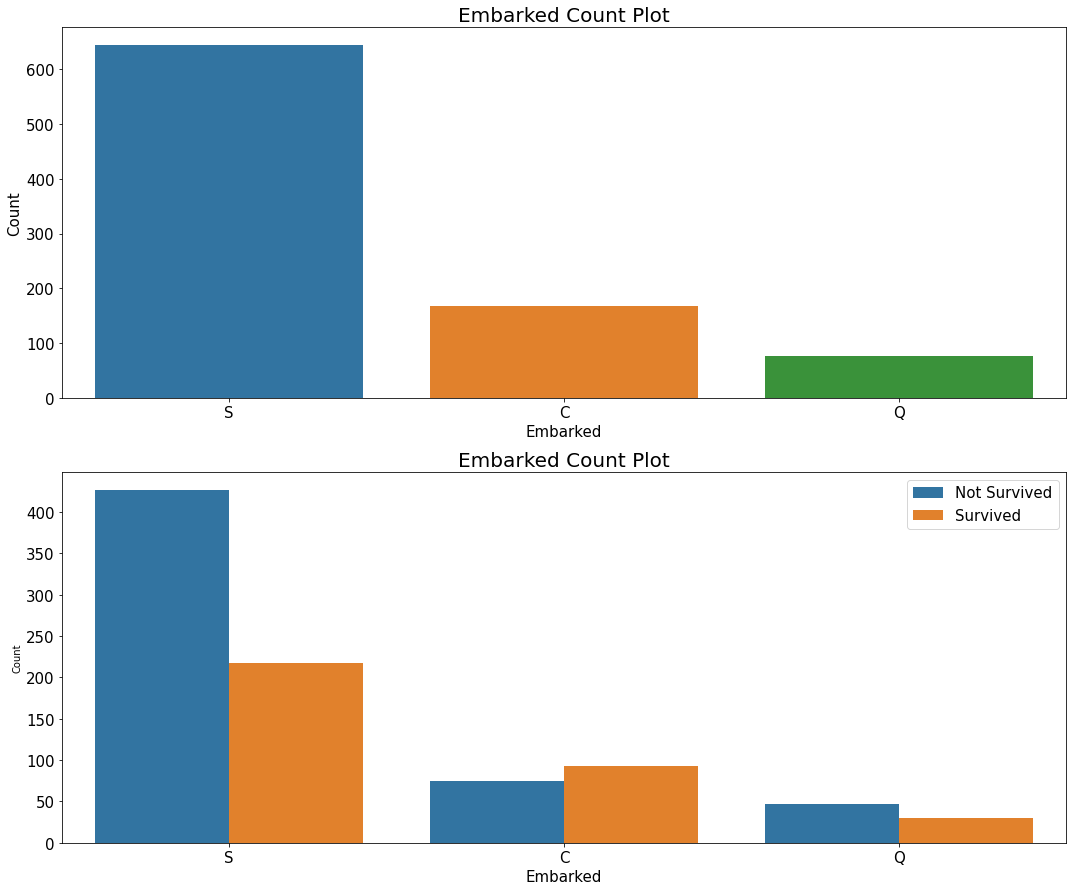

In [108]:
count_subplots(train, 'Embarked')

We can see that passenger who boarded from Cherbourg has many chance to survive than other. 

<b>So can we consider that feature is a important feature to predict survival?</b>

### 1.2.5 Embarked and Pclass feature

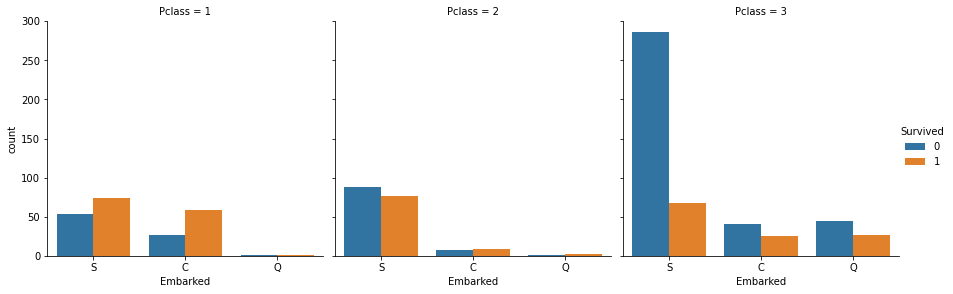

In [109]:
# Factor plot function for comparing each features. 

def factor_plots(data, feature1, feature2 = None, col = None, hue = None, kind = 'point', ylim = None, xlim = None):
        g = sns.factorplot(feature1, feature2, col = col, hue = hue, kind = kind, data = data)
        #if feature2 != None:
        #    plt.title("{} and {}'s {} plot".format(feature1, feature2, kind))
        #else:
        #    plt.title("{}'s {} plot".format(feature1, kind))
        fig = plt.gcf()
        fig.set_size_inches(13, 4)
        
        if ylim != None:
            plt.ylim(ylim)
        if xlim != None:
            plt.xlim(xlim)
            
        plt.show()

factor_plots(train, 'Embarked',  kind = 'count', hue = 'Survived', col = 'Pclass')

Now we can see why Embarked 'C' has higher survival rate than others. There are many 1st class passengers from Cherbourg

### 1.2.6 Pclass, Sex and Embarked with Survived feature

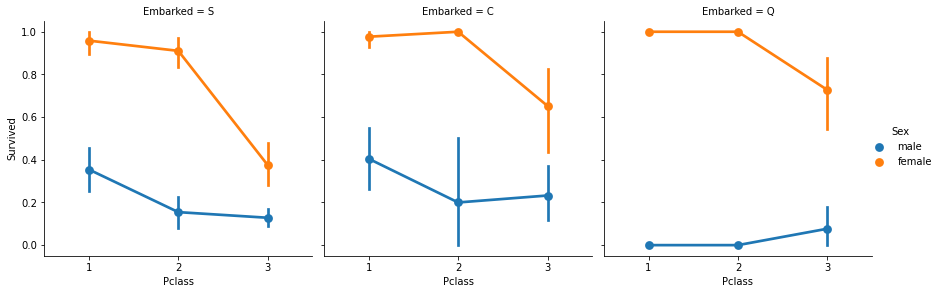

In [110]:
factor_plots(train, 'Pclass', 'Survived', hue = 'Sex',  kind = 'point', col = 'Embarked')

We can see that regardless of aboarded port(Embarked) 1st, 2nd passengers has higher survival rate than 3rd passengers without men who aboarded from Queenstown(Embarked = Q). And we can see one more that female has higher survival rate than male.

<b>We can see one more that Sex, Pclass are important features to predict survival.</b>

### 1.2.7 Age, Sex with survived feature

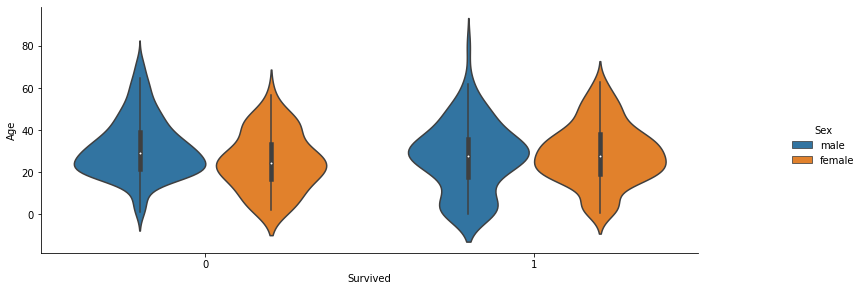

In [111]:
factor_plots(train, 'Survived', 'Age', hue = 'Sex', kind = 'violin')

When we checked the correlation heatmap, we saw that there are no correlation between <b>Age</b> and <b>Survived</b>. However we can see that the youngest and oldest passengers is higher to survive than others. That's why there are no correlation between Age and Survived. the youngest passengers has higher survival rate than middle-aged passengers. And middle-aged passengers has lower survival rate than the oldest passengers. So it can't be checked correlation between them.

<b> So if we engineer Age feature, we can use it to predict survival</b>

### 1.2.8 Fare and Pclass with Survived feature

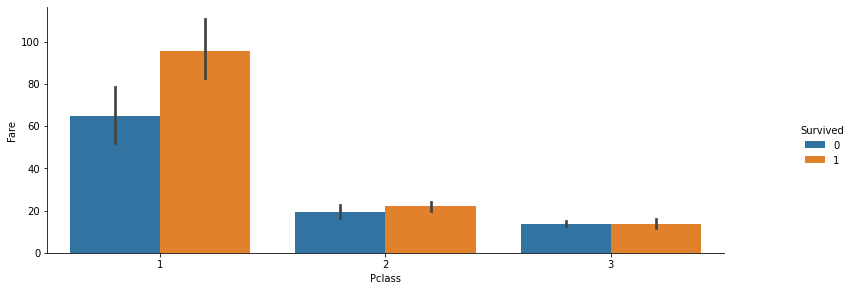

In [112]:
factor_plots(train, 'Pclass', 'Fare', hue = 'Survived', kind = 'bar')

we can think that if Fare is higher, Pclass is higher. So we create plot that xaix is Pclass, yaxis is Fare and hue is Survived. Our though is somewhat right.

### 1.2.9 Age and Fare distplot
##### Checking the numerical features about skewness

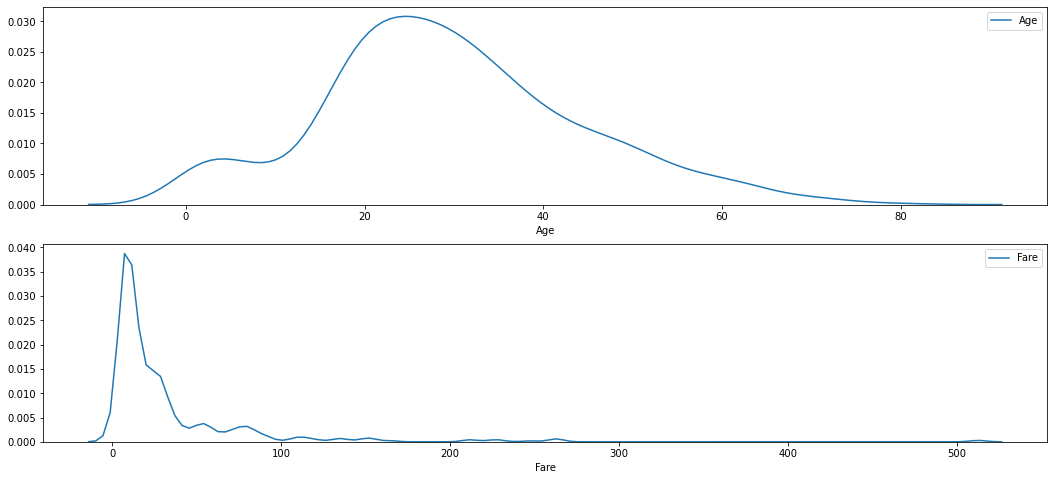

In [113]:
f, ax = plt.subplots(2, figsize = (18, 8))
sns.distplot(train['Age'], label = 'Age', hist = False, ax = ax[0])
sns.distplot(train['Fare'], label = 'Fare', hist = False, ax = ax[1])
plt.show()

We can see that Fare is positively skewed. As we confirmed before, Fare and Pclass has some correlation with Survived. However as we will engineer Age feature, we will engineer Fare feature too.

<b>So we will engineer Fare feature.</b>

# 2. Feature Engineering

We checked features. Now we will engineer features for modeling. Before we engineer features, we have to think of which model we will use for predicting Survived roughly. Because every model has comparatively each advantages and shortages. For example, regression analysis is weak for outliers, But tree based classification is not. It caused by different classification criteria.

We will use tree based classification and Logistic Regression model. So we have to engineer Fare feature by binding because it has positive skew that can make noise in Regression model.

And there are some null data in input features. So we have to fill it correctly. It should be done after filling null-values in features.

We can create some features by combining some features. It makes our model more correctly.

So we have some steps:
<b>
1. Filling null-values
2. Binding numeric features
3. Creating some features
4. One-Hot Encoding.
5. Delete useless features.
</b>

## 2.1 Filling null-values

Before we start, we have to combining training and test set. If we pass this step, we can't predict survival because of differences of number of columns and column's information.

In [114]:
df = pd.concat(objs = [train, test], axis = 0).reset_index(drop = True)
df.head(-5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1300,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1302,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [115]:
# Check null data
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

There are some null-values:
- Survived
- Age
- Cabin
- Embarked
- Fare

Survived is due to test set. <b>So we have to fill null-values in Age, Cabin and Embarked</b>

### 2.1.1 Filling null-values in Age
How can we fill null-values in Age? It can be done by filling median values without null-values. However Age is important feature to predict Survived, we have to be careful with filling it. It can make noise. Then how can we do this?

Why don't we check Age's correlation? Pclass has the highest correlation with Age. So we will fill it by Pclass and Sex. I refer to this notebook, [Titanic-Advanced Feature Engineering Tutorial](https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial)

In [116]:
age_by_pclass_sex = df.groupby(['Sex', 'Pclass'])['Age'].median()
print(age_by_pclass_sex)

df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64


In [117]:
df['Age'].isnull().sum()

0

### 2.1.2 Filling null-values in Cabin

There are many null-values in Cabin. if we fill null-values roughly, it leads us to make wrong model. So we have to be careful with handle this feature. Then first, check whether it is worth to bear the risk.

Cabin means cabin number, so I think it can be related to Pclass and Survived. So we will extract it's Initial consonant.

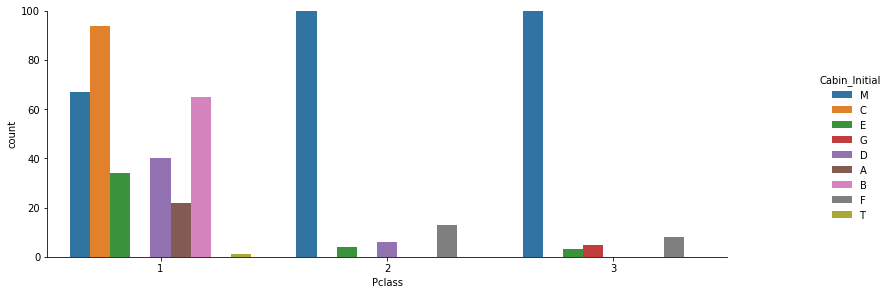

In [118]:
# Extracting Initial consonant
df['Cabin_Initial'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
factor_plots(df, 'Pclass', hue = 'Cabin_Initial', kind = 'count', ylim = [0, 100])

There are some correlation between Pclass and Cabin_Initial. Some Cabin_Initial is concentrated on 1st Class. So we will use this feature. Then we will be grouped this features by class.
- A, B, C and T are 1st class passengers. So it will be grouped by ABCT.
- D and E are similar passenger class distribution. So it will be grouped by DE.
- F and G are similar passenger class distribution. Sp it will be grouped by FG.
- M is very different from others. So it doesn't need to be grouped.

In [119]:
df['Cabin_Initial'] = df['Cabin_Initial'].replace(['A', 'B', 'C', 'T'], 'ABCT')
df['Cabin_Initial'] = df['Cabin_Initial'].replace(['D', 'E'], 'DE')
df['Cabin_Initial'] = df['Cabin_Initial'].replace(['F', 'G'], 'FG')
df['Cabin_Initial'].value_counts()

M       1014
ABCT     182
DE        87
FG        26
Name: Cabin_Initial, dtype: int64

In [120]:
df['Cabin_Initial'].isnull().sum()

0

### 2.1.3 Filling null-values in Embarked
First we will find two null-data's common features

In [121]:
df.loc[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Initial
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,ABCT
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,ABCT


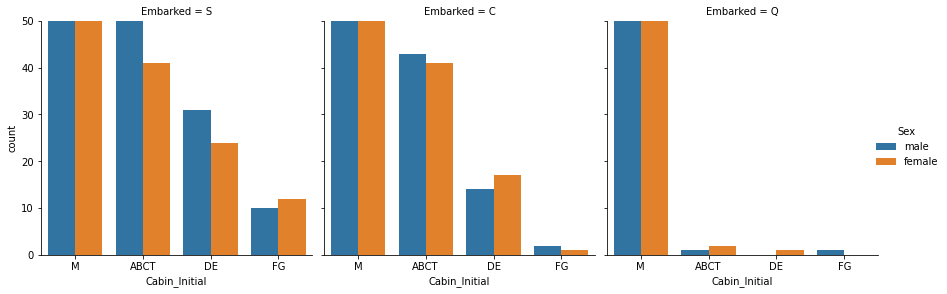

In [122]:
factor_plots(df, 'Cabin_Initial', kind = 'count', ylim = [0, 50],
             hue = 'Sex', col = 'Embarked')

There are same Cabin between two data. So we can consider they are companion. So we tried to input values in Embarked by Cabin and Sex. However it is very similar between 'S' and 'C'.

<b>So I searched them name and found that they boarded from Southampton.</b>

Sometimes it is helpful to search that we don't know.

In [123]:
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'].isnull().sum()

0

### 2.1.4 Filling null-values in Fare
We will fill it by Pclass and Embarked

In [124]:
df.iloc[df['Fare'].loc[df['Fare'].isnull()].index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Initial
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,M


In [125]:
df['Fare'] = df['Fare'].fillna(df.groupby(['Pclass', 'Embarked'])['Fare'].median()[3]['S'])
df['Fare'].isnull().sum()

0

## 2.2 binding numeric features
- Category feature ->> Ordinary feature.

### 2.2.1 Age_band
As we saw bofore, We can guess relation between Age and Survival is almost <b>quadratic function shape.</b> (youngest -> 1 / middle -> 0 / oldest -> 1) So correlation between Age and Survival has to be very low.

Before I choosed the number to divide, I would divide it several times and choose number to divide based on correlation mean. However It is difficult to choose number to divide based of correlation mean. Because number to divide is higher, correlation mean is also higher. So I couldn't choose this method. Finally I choosed the number arbiratily.


<b>We will divide them by 8.</b>

In [126]:
# binding numeric feature function
# We have to do this process twice(Age, Fare). So I think that creating function is more efficient.


def binding_band(column, binnum):
    df[column + '_band'] = pd.qcut(df[column].map(int), binnum)

    for i in range(len(df[column + '_band'].value_counts().index)):
        print('{}_band {} :'.format(column, i), df[column + '_band'].value_counts().index.sort_values(ascending = True)[i])
        df[column + '_band'] = df[column + '_band'].replace(df[column + '_band'].value_counts().index.sort_values(ascending = True)[i], int(i))
        
    df[column + '_band'] = df[column + '_band'].astype(int)    
    
    return df.head()

binding_band('Age',8)


"""
Correlation Check
te = []
temp = 0
for j in range(80):
    for i in range(len(df.groupby('Age_band').Survived.mean())):
        temp += df.groupby('Age_band').Survived.mean()[i]
    te.append(temp / len(df.groupby('Age_band').Survived.mean()))
"""

Age_band 0 : (-0.001, 18.0]
Age_band 1 : (18.0, 22.0]
Age_band 2 : (22.0, 25.0]
Age_band 3 : (25.0, 26.0]
Age_band 4 : (26.0, 30.0]
Age_band 5 : (30.0, 36.0]
Age_band 6 : (36.0, 45.0]
Age_band 7 : (45.0, 80.0]


"\nCorrelation Check\nte = []\ntemp = 0\nfor j in range(80):\n    for i in range(len(df.groupby('Age_band').Survived.mean())):\n        temp += df.groupby('Age_band').Survived.mean()[i]\n    te.append(temp / len(df.groupby('Age_band').Survived.mean()))\n"

### 2.2.2 Fare_band

<b>We will divide it 6.</b>

In [127]:
binding_band('Fare', 6)

Fare_band 0 : (-0.001, 7.0]
Fare_band 1 : (7.0, 8.0]
Fare_band 2 : (8.0, 14.0]
Fare_band 3 : (14.0, 26.0]
Fare_band 4 : (26.0, 53.0]
Fare_band 5 : (53.0, 512.0]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Initial,Age_band,Fare_band
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,ABCT,6,5
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,M,3,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,ABCT,5,4
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,M,5,1


## 2.3 Creating some features
We can create more features based on EDA and domain knowledge, and it will make model more accurate. I will create several features:
- <b>Initial</b> : It has very many information like marriage. It could be important feature.
- <b>Alone</b> : As we saw before, the survival rate of those who aboarded alone was lower than others. It can be new feature.
- <b>Companion_Survival_Rate</b>: We can think that the situation at the time of the Titanic's sinking is very important. So if we can find companion, it make model more accurate. We will find it by median of survival rate of Ticket, Family Size(Parch + SibSp + 1).


### 2.3.1 Creating Initial feature

In [128]:
df['Initial'] = 0
for i in range(len(df['Name'])):
    df['Initial'].iloc[i] = df['Name'][i].split(',')[1].split('.')[0].strip()

df['Initial'].value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Rev', 'Dr', 'Col', 'Major', 'Ms',
       'Mlle', 'Don', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Dona',
       'the Countess', 'Mme'],
      dtype='object')

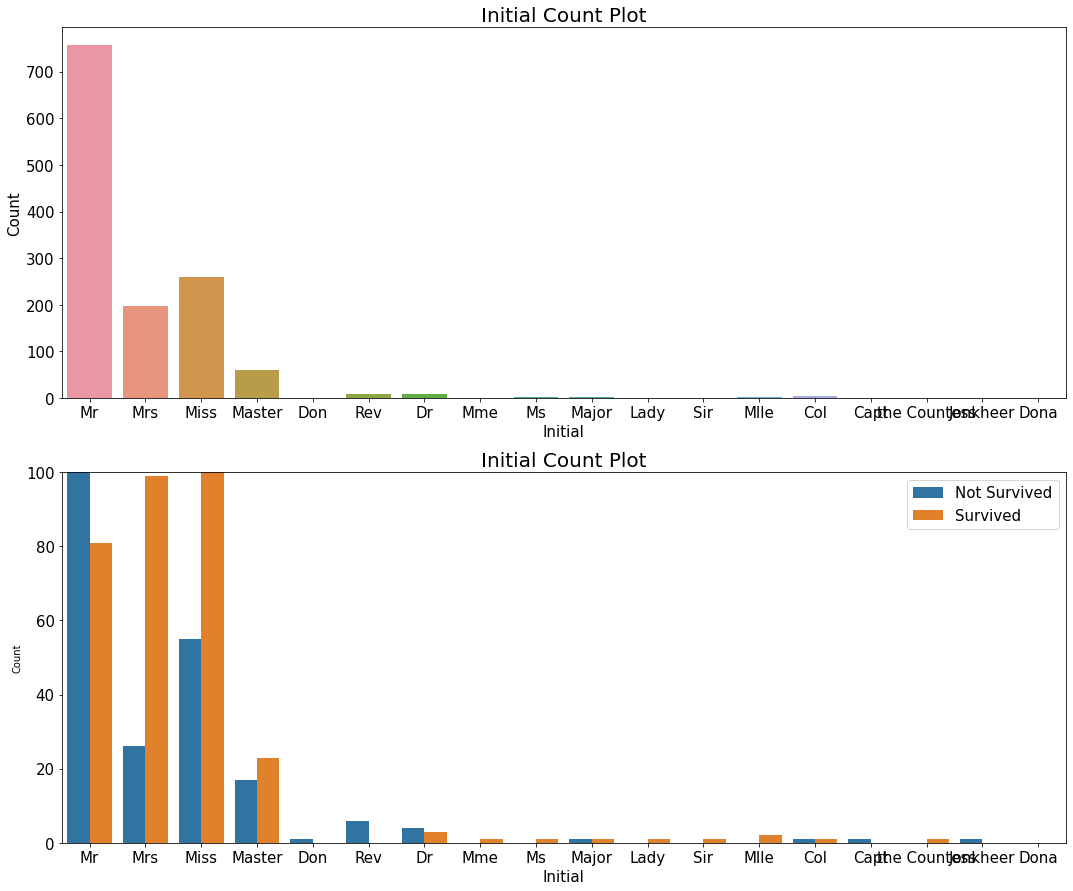

In [129]:
count_subplots(df, 'Initial', ylim = [0, 100])

- Mrs, Miss, Master, Mme, Ms, Lady, Sir, Mlle and Countess has very higher survival rate.(more than half) <b>So it will be group as  Mrs/Miss/Master.</b>
- Most are 'Mr' but most of them are dead. <b>So it doesn't need to be grouped.</b>
- The rest will be grouped under the name of  <b>Others</b> in a timely manner

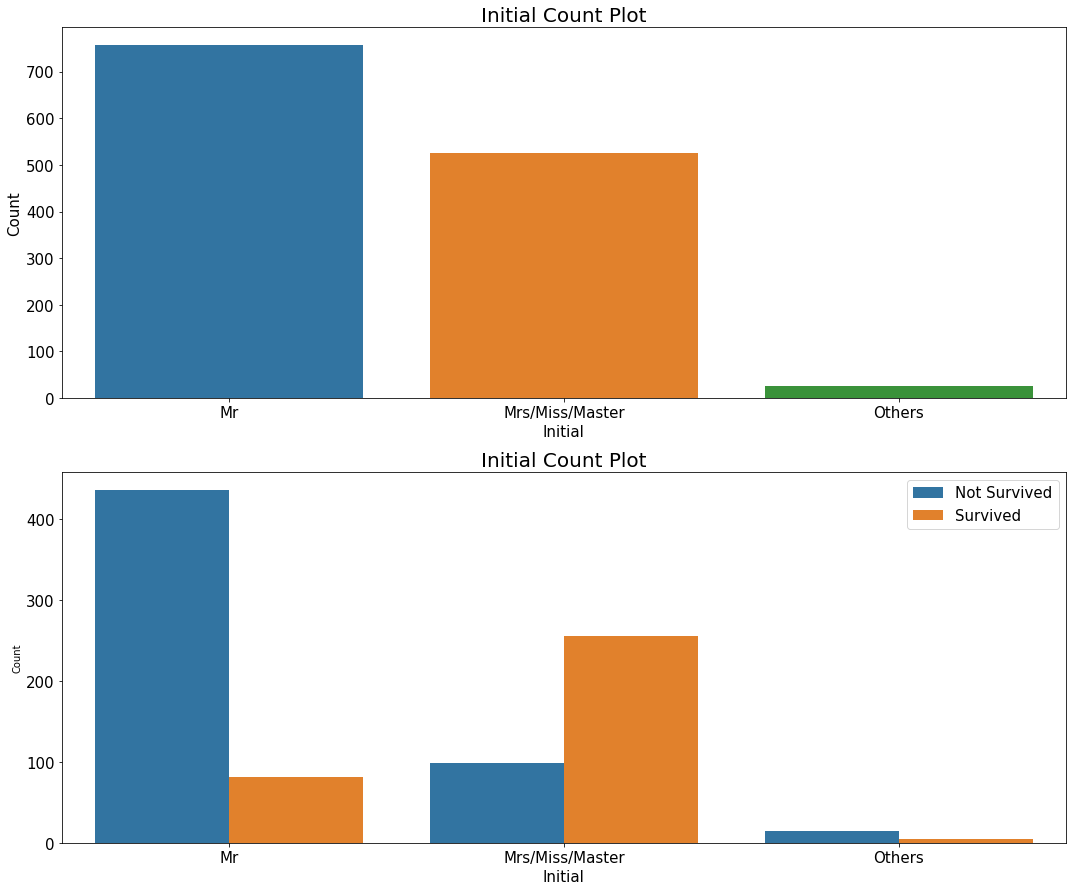

In [130]:
Mrs_Miss_Master = []
Others = []

for i in range(len(df.groupby('Initial')['Survived'].mean().index)):
    if df.groupby('Initial')['Survived'].mean()[i] > 0.5:
        Mrs_Miss_Master.append(df.groupby('Initial')['Survived'].mean().index[i])
    elif df.groupby('Initial')['Survived'].mean().index[i] != 'Mr':
        Others.append(df.groupby('Initial')['Survived'].mean().index[i])
    
df['Initial'] = df['Initial'].replace(Mrs_Miss_Master, 'Mrs/Miss/Master')
df['Initial'] = df['Initial'].replace(Others, 'Others')

count_subplots(df, 'Initial')

### 2.3.2 Creating Alone feature

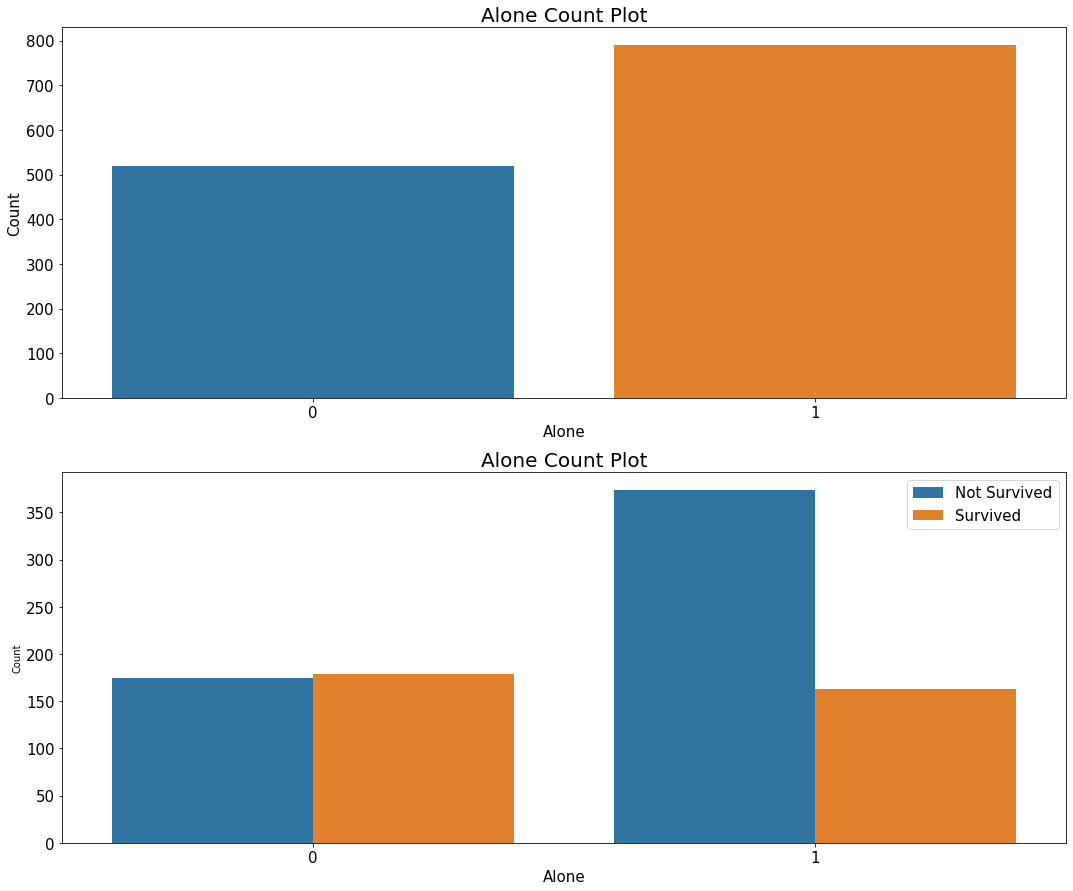

In [131]:
df['Alone'] = 0
df['Alone'].loc[(df['SibSp'] + df['Parch']) == 0] = 1

count_subplots(df, 'Alone')

#### 2.3.3 Creating Companion's survival rate

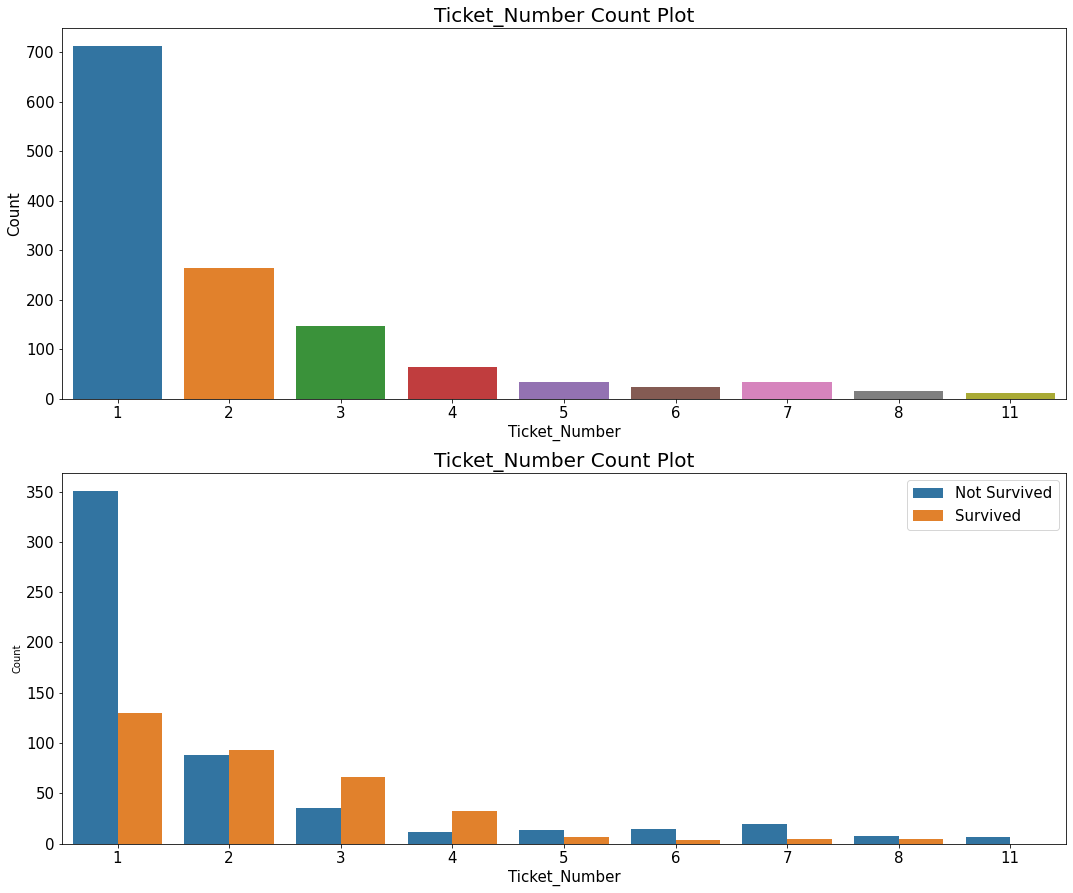

In [132]:
# Ticket_Size : Number of same ticket name
df['Ticket_Number'] = df['Ticket'].replace(df['Ticket'].value_counts().index, df['Ticket'].value_counts())
count_subplots(df, 'Ticket_Number')

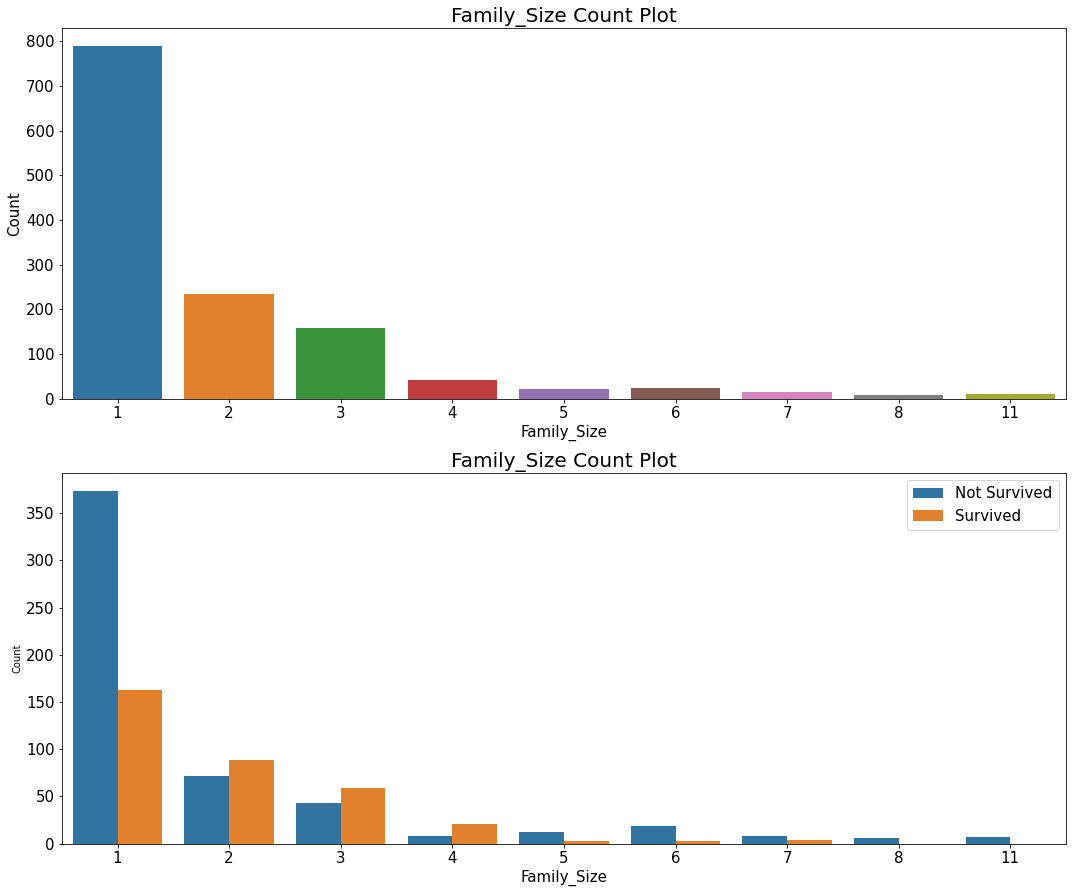

In [133]:
# Family_Size : Number of family members on aboared Titanic
df['Family_Size'] = df['Parch'] + df['SibSp'] + 1
count_subplots(df, 'Family_Size')

##### Correlation between Family_Size and Ticket_number

In [134]:
df.loc[:,('Family_Size', 'Ticket_Number')].corr()

,Family_Size,Ticket_Number
Family_Size,1.000000,0.800556
Ticket_Number,0.800556,1.000000


Because of its high correlation, if learning a model using two features together, they are can lead to problems with multicollinearity. 

<b>So we will find survival rates according to the two features respectively and average the two values and use them as new feature('Companion_Survival_Rate')</b>

In [135]:
# Create Companion_Survival_Rate feature
df['Companion_Survival_Rate'] = 0
for i, j in df.groupby(['Family_Size', 'Ticket_Number'])['Survived'].mean().index:
    df['Companion_Survival_Rate'].loc[(df['Family_Size'] == i) & (df['Ticket_Number'] == j)] = df.groupby(['Family_Size', 'Ticket_Number'])["Survived"].mean()[i, j]
    
df.loc[df['Companion_Survival_Rate'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Initial,Age_band,Fare_band,Initial,Alone,Ticket_Number,Family_Size,Companion_Survival_Rate
1285,1286,NaN,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.025,NaN,S,M,4,3,Mr,0,3,5,NaN


There are one null-value in Companion_Survival_Rate. This is because there is a combination of Family_Size and Ticket_Number in the test set that is not in the training set.

<b>So it will be replaced by mean survival rate between the combination that the value belongs to.</b>(Family_Size = 5, Ticket_Size = 3)

In [136]:
# Calculation means of combination of Family_Size 5 and Ticket_Number 3.

# It is too long to write down at once, so calculated by dividing the variables
comb_sum = df.loc[df['Family_Size'] == 5]['Survived'].sum() + df.loc[df['Ticket_Number'] == 3]['Survived'].sum()
comb_counts = df.loc[df['Family_Size'] == 5]['Survived'].count() + df.loc[df['Ticket_Number'] == 3]['Survived'].count()
mean = comb_sum / comb_counts

df['Companion_Survival_Rate'] = df['Companion_Survival_Rate'].fillna(mean)
df['Companion_Survival_Rate'].isnull().sum()

0

## 2.4 Encoding Categorical Features 
- <b> It should be done about categorical features.</b> Except for the ordinal feature, which is an ordered variable, one-hot-encoding must be carried out to properly modelling. If one-hot-encoding is not carried out, the model learns that there is a meaning between the value differences of the category variable.

- <b>We will also proceed with n-1 encoding to solve the multicollinearity problem.</b>

In [137]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical features
cate_col = []
for i in [4, 11, 12, 15]:
    cate_col.append(df.columns[i])

cate_df = pd.get_dummies(df.loc[:,(cate_col)], drop_first = True)
df = pd.concat(objs = [df, cate_df], axis = 1).reset_index(drop = True)

## 2.5 Delete useless features

In [138]:
df = df.drop(['Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked', 'Cabin_Initial', 'SibSp', 'Parch',
              'Cabin', 'Initial', 'Ticket_Number', 'Family_Size'], axis = 1)

## Heatmap after engineering features

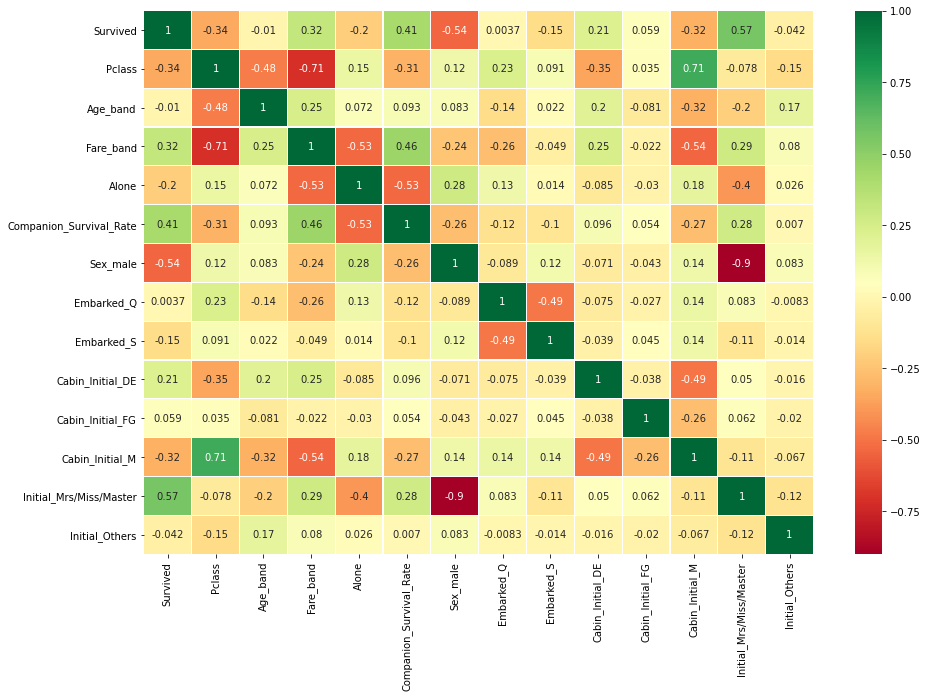

In [147]:
sns.heatmap(df.drop(['PassengerId'], axis = 1).corr(), annot = True, cmap = 'RdYlGn', linewidth = 0.2)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

# 3. Modeling

It is time to predict survival rate. we will use some models and ensemble methods. Various parameters are required for each model. We will use ensemble techniques to learn different models, so we will get the best parameters through hyperparameters about this dataset. We will also use models with adjusted parameters to apply ensemble techniques and submit final models.

We have two steps:
<b>
1. Hyper parameter tuning
2. Ensembling
</b>

In [140]:
# Importing all the required ML packages
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn import svm # support vector machine
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import train_test_split # training and testing data split
#from sklearn import metrics # accuracy measure
from sklearn.model_selection import KFold # for K-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction
from sklearn.preprocessing import StandardScaler # StandardScaler

# Split data
df = df.astype(float)
train = df[:891]
test = df[891:]

"""
val_train, val_test = train_test_split(train, test_size = 0.3, random_state = 1, stratify = train['Survived'])
val_train_X = val_train[val_train.columns[1:]]
val_train_Y = val_train[val_train.columns[:1]]
val_test_X = val_test[val_test.columns[1:]]
val_test_Y = val_test[val_test.columns[:1]]
"""

train_X = StandardScaler().fit_transform(train.drop(columns = ['PassengerId', 'Survived']))
train_Y = train['Survived']
test_X = StandardScaler().fit_transform(test.drop(columns = ['PassengerId', 'Survived']))


## 3.1 HyperParameter Tuning for selecting parameter
- <b>Hyperparameter techniques will be used to select parameters.</b>

Especially RandomForest's hyperparameter tuning process takes a very long time. So. someone who run this notebook should keep in mind about this. If you don't have enough time, I recommend you to pass this step, and check the parameter under this cell.

In [141]:
estimators = []
params = []

# SVM parameter
C = np.arange(0.1, 1.1, 0.1)
gamma = np.arange(0.1, 1.1, 0.1)
kernel = ['rbf', 'linear']
SVM_params = {'kernel' : kernel, 'gamma' : gamma, 'C' : C}

estimators.append(svm.SVC())
params.append(SVM_params)


# RandomForestClassifier parameter
n_estimators = np.arange(800, 1800, 200)
max_depth = range(3, 7)
min_samples_split = range(3, 7)
min_samples_leaf = range(3, 7)
RF_params = {'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
            'min_samples_leaf' : min_samples_leaf}
#RF_params = {'n_estimators' : n_estimators}

estimators.append(RandomForestClassifier())
params.append(RF_params)


# KNeighborsClassifier parameter
n_neighbors = range(1, 11)
KN_params = {'n_neighbors' : n_neighbors}

estimators.append(KNeighborsClassifier())
params.append(KN_params)


# DecisionTreeCalssifier parameter
criterion = ['gini', 'entropy']
max_depth = range(10, 100, 10)
#min_samples_leaf = range(2, 5)
#max_leaf_nodes = range(1, 10)
#DT_params = {'criterion' : criterion, 'max_depth' : max_depth, 'min_samples_splits' : min_samples_splits,
#            'min_samples_leaf' : min_samples_leaf, 'max_leaf_nodes': max_leaf_nodes}
DT_params = {'criterion' : criterion, 'max_depth' : max_depth}

estimators.append(DecisionTreeClassifier())
params.append(DT_params)

# LogisticeRegression parameter
C = np.arange(0.1, 1.1, 0.1)
LR_params = {'C' : C}

estimators.append(LogisticRegression())
params.append(LR_params)

# Run GridSearchCV() to select best parameter by each model.
for i in range(len(estimators)):
    gd = GridSearchCV(estimator = estimators[i], param_grid = params[i], verbose = True, cv = 3)
    gd.fit(train_X, train_Y)
    print("{}'s best score :".format(estimators[i]), gd.best_score_)
    print("{}'s best parameters :".format(estimators[i]), gd.best_params_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVC()'s best score : 0.8361391694725028
SVC()'s best parameters : {'C': 0.6, 'gamma': 0.1, 'kernel': 'rbf'}
Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed: 23.8min finished


RandomForestClassifier()'s best score : 0.8428731762065095
RandomForestClassifier()'s best parameters : {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 1000}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KNeighborsClassifier()'s best score : 0.8237934904601572
KNeighborsClassifier()'s best parameters : {'n_neighbors': 9}
Fitting 3 folds for each of 18 candidates, totalling 54 fits
DecisionTreeClassifier()'s best score : 0.8103254769921436
DecisionTreeClassifier()'s best parameters : {'criterion': 'gini', 'max_depth': 80}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
LogisticRegression()'s best score : 0.8428731762065095
LogisticRegression()'s best parameters : {'C': 0.30000000000000004}


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


#### Parameter
##### SVM
- kernel = 'rbf', C = 0.6, gamma = 0.1

##### RandomForestClassifier
- max_depth = 3, min_samples_leaf = 3, min_samples_split = 6, n_estimators = 1000

##### KNeighborsClassifier
- n_neighbors = 9

##### DecisionTreeClassifier
- criterion = 'gini', max_depth = 80

##### LogisticRegression
- C = 0.3

In [535]:
base_estimators = [svm.SVC(kernel = 'rbf', C = 0.6, gamma = 0.1),
                   RandomForestClassifier(max_depth = 3, min_samples_leaf = 3, min_samples_split = 6, n_estimators = 1000),
                   KNeighborsClassifier(n_neighbors = 9),
                   DecisionTreeClassifier(criterion = 'gini', max_depth = 80),
                   LogisticRegression(C = 0.3)]
single_models_predict = []
single_models_score = []
single_models = {}

for i in range(len(base_estimators)):
    base_estimators[i].fit(train_X, train_Y)
    single_models['{}'.format(str(base_estimators[i]).split('(')[0])] = base_estimators[i]
    single_models_predict.append(base_estimators[i].predict(test_X))
    single_models_score.append((cross_val_score(base_estimators[i], train_X, train_Y, cv = 3, scoring = 'accuracy')).mean())

SVC
RandomForestClassifier
KNeighborsClassifier
DecisionTreeClassifier
LogisticRegression


## Single model Accuracy

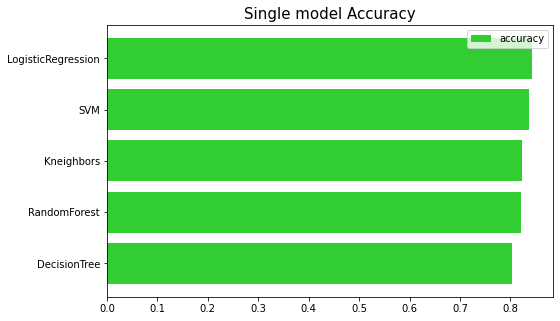

In [249]:
single_model = ['SVM', 'RandomForest', 'Kneighbors', 'DecisionTree', 'LogisticRegression']
single_model_dataframe = pd.DataFrame({'accuracy' : single_models_score}, index = single_model).sort_values('accuracy')

single_model_dataframe.plot.barh(width = 0.8, color = 'limegreen')
plt.title('Single model Accuracy', size = 15)
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

It shows a fairly good accuracy! <b>We can create models from this single model by ensemble!</b>

## 3.2 Ensembling
### 3.2.1 Boosting
<b> This step takes a very long time. (About 20 minutes on my computer) Accordingly, I recommend that you check only the parameter values and move on. Especially RandomForest's boost take a very long time. So we will pass at random only.</b>

In [156]:
import xgboost as xg
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

models = {}
models_ensemble_name = []
models_score = []
error_ = []

base_estimators = [svm.SVC(kernel = 'rbf', C = 0.6, gamma = 0.1),
#                   RandomForestClassifier(max_depth = 3, min_samples_leaf = 3, min_samples_split = 6, n_estimators = 1000),
                   KNeighborsClassifier(n_neighbors = 9),
                   DecisionTreeClassifier(criterion = 'gini', max_depth = 80),
                   LogisticRegression(C = 0.3)]
for i in range(len(base_estimators)):

    boosts = []
    boosts.append(xg.XGBClassifier(base_estimator = base_estimators[i]))
    boosts.append(GradientBoostingClassifier())
    boosts.append(AdaBoostClassifier(base_estimator = base_estimators[i]))

    n_estimators = range(100, 600, 100)
    learning_rate = np.arange(0.1, 1.1, 0.1)
    params = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate}

    for j in range(len(boosts)):
        try:
            if not(i != 0 and j == 1):
                pass
                gd = GridSearchCV(estimator = boosts[j], param_grid = params, verbose = True, cv = 2)
                gd.fit(train_X, train_Y)
                # print("{}'s best score :".format(str(boosts[j])[:3]), gd.best_score_)
                # print("{}'s best parameters :".format(str(boosts[j])[:3]), gd.best_params_)
                models['{}_{}'.format(str(base_estimators[i]).split('(')[0], str(boosts[j])[:3])] = gd.best_estimator_
                models_ensemble_name.append('{}_{}'.format(str(base_estimators[i]).split('(')[0], str(boosts[j])[:3]))
                models_score.append(gd.best_score_)
        except TypeError as TE:
            error_.append(str(base_estimators[i]).split('(')[0] + str(boosts[j])[:3] + '_TE')
        except ValueError as VE:
            error_.append(str(base_estimators[i]).split('(')[0] + str(boosts[j])[:3] + '_VE')     

            
# AdaBoost for RandomForest
# Parameter : learning_rate = 0.1, n_estimators = 100

RF_Ada = AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth = 3, min_samples_leaf = 3, min_samples_split = 6, n_estimators = 1000), learning_rate = 0.1, n_estimators = 100)
models_score.append((cross_val_score(RF_Ada, train_X, train_Y, cv = 3, scoring = 'accuracy')).mean())
RF_Ada = RF_Ada.fit(train_X, train_Y)
models['RF_Ada'] =  RF_Ada
models_ensemble_name.append('RF_Ada')

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[17:29:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[17:29:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used

[17:29:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used


[17:29:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only use

[17:29:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used

[17:29:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[17:29:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 50 candidates, totalling 100 fits
Fitting 2 folds for each of 50 candidates, totalling 100 fits
[17:29:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[17:29:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used

[17:29:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used


[17:29:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only use

[17:29:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used


[17:29:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only use

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 50 candidates, totalling 100 fits
[17:29:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

 


[17:29:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only use


[17:29:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only use

[17:29:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used


[17:29:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only use

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   51.8s finished


Fitting 2 folds for each of 50 candidates, totalling 100 fits
[17:30:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[17:30:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used

[17:30:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used

[17:30:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used

[17:30:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used

[17:31:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[17:31:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


### Boosting Parameter
- SVC_XGB : learning_rate = 0.1, n_estimators = 100
- KNeighborsClassifier_XGB : learning_rate = 0.1, n_estimators = 100
- DecisionTreeClassifier_XGB : learning_rate = 0.1, n_estimators = 100
- DecisionTreeClassifier_Ada : learning_rate = 0.6, n_estimators = 400
- LogisticRegression_XGB : learning_rate = 0.1, n_estimators = 100 
- LogisticRegression_Ada : learning_rate = 0.4, n_estimators = 500
- RF_Ada : learning_rate = 0.1, n_estimators = 100

### 3.2.2 Bagging

In [158]:
from sklearn.ensemble import BaggingClassifier



"""
base_estimators = [svm.SVC(kernel = 'rbf', C = 0.6, gamma = 0.1),
#                   RandomForestClassifier(max_depth = 3, min_samples_leaf = 3, min_samples_split = 6, n_estimators = 1000),
                   KNeighborsClassifier(n_neighbors = 9),
                   DecisionTreeClassifier(criterion = 'gini', max_depth = 80),
                   LogisticRegression(C = 0.3)]
"""

param ={'n_estimators' : range(100, 600, 100)}

for i in range(len(base_estimators)):
    try:
        gd = GridSearchCV(estimator = BaggingClassifier(base_estimator = base_estimators[i]), param_grid = param, verbose = True, cv = 3)
        gd.fit(train_X, train_Y)
        models['{}_Bagging'.format(str(base_estimators[i]).split('(')[0])] = gd.best_estimator_
        models_ensemble_name.append('{}_Bagging'.format(str(base_estimators[i]).split('(')[0]))
        models_score.append(gd.best_score_)

    except TypeError:
        error_.append(str(base_estimators[i]).split('(')[0] + '_Bagging')
    

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   26.6s finished


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   29.2s finished


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    8.4s finished


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   22.4s finished


### Bagging parameter
- SVM_Bagging : n_estimators = 200
- KNeighborsClassifier_Bagging = 400
- DecisionTreeClassifier_Bagging = 300
- LogisticRegression_Bagging = 200

### 3.2.3 Voting

In [160]:
from sklearn.ensemble import VotingClassifier

VC = VotingClassifier(estimators = [('SVM', svm.SVC(kernel = 'linear', C = 0.4, gamma = 0.1, probability = True)),
                                   ('RF', RandomForestClassifier(max_depth = 5, min_samples_leaf = 3, min_samples_split = 3, n_estimators = 1600)),
                                   ('KN', KNeighborsClassifier(n_neighbors = 10)),
                                   ('DT', DecisionTreeClassifier(criterion = 'entropy', max_depth = 40)),
                                   ('LR', LogisticRegression(C = 0.3))],
                      voting = 'soft')

models_score.append((cross_val_score(VC, train_X, train_Y, cv = 3, scoring = 'accuracy')).mean())
VC = VC.fit(train_X, train_Y)
models['Voting'] = VC
models_ensemble_name.append('Voting')

## Ensemble Model Accuracy vs Single Model Accuracy

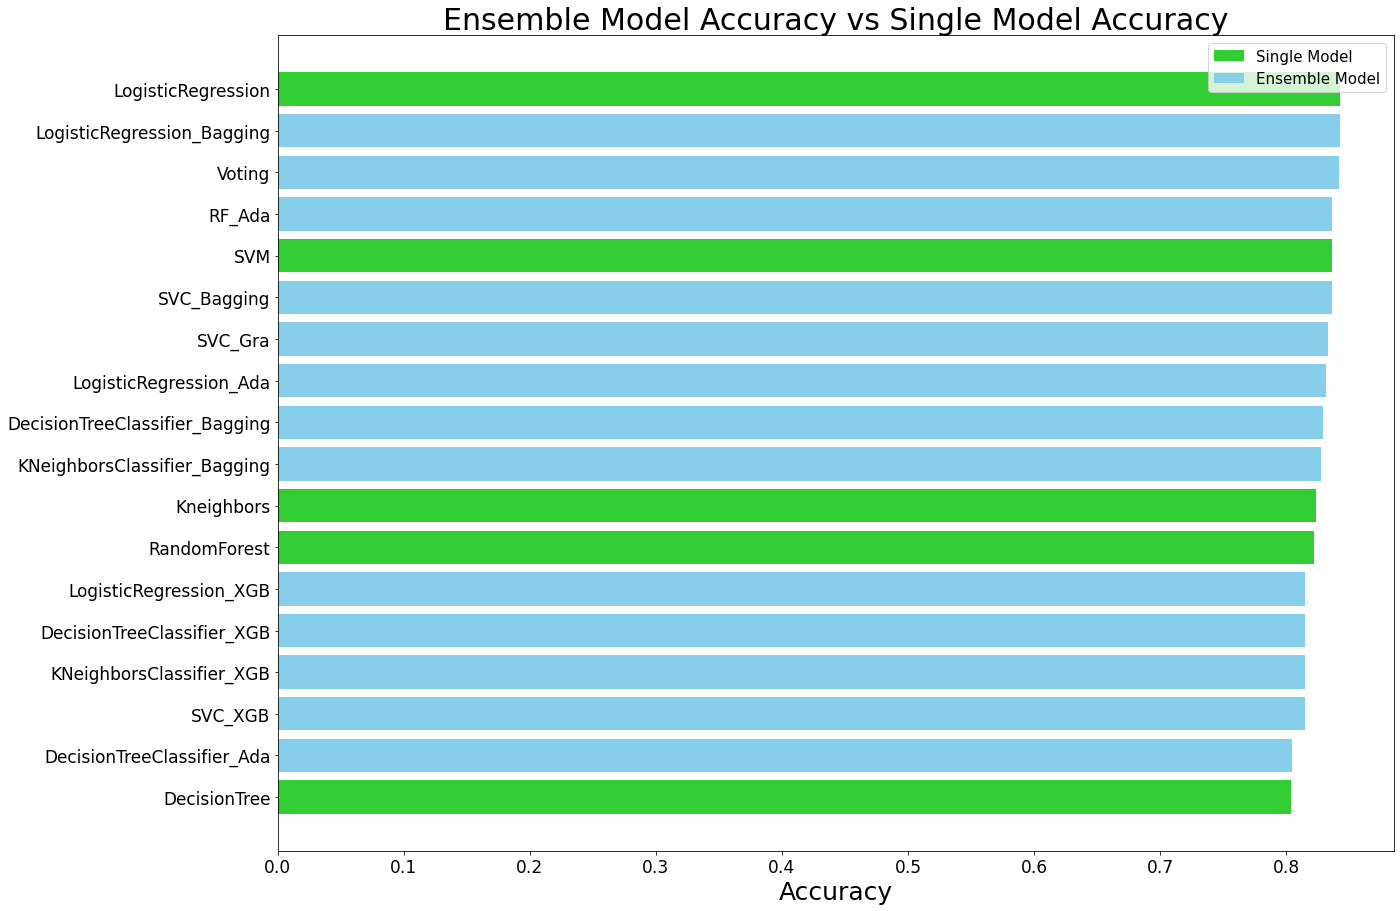

In [505]:
scores = models_score + single_models_score
models_name = list(models.keys()) + single_model
dic_model = {}
for i in range(len(scores)):
    dic_model[models_name[i]] = scores[i]
dic_model = {k: v for k, v in sorted(dic_model.items(), key = lambda item: item[1])}
scores = list(dic_model.values())
models_name = list(dic_model.keys())


# Accuracy barh plot
ind = np.arange(len(models_name))
width = 0.8
fig, ax = plt.subplots(figsize = (20, 15))

for i in range(len(models_name)):
    if '_' in models_name[i] or  models_name[i] == 'Voting':
        ax.barh(ind[i], scores[i], width, color='skyblue')
    else:
        ax.barh(ind[i], scores[i], width, color='limegreen')

ax.tick_params(labelsize = 17)
ax.set_yticklabels(models_name, size = 17)
ax.set_yticks(ind)
ax.set_xlabel('Accuracy', size = 25)
ax.legend(labels = ['Single Model', 'Ensemble Model'], loc = 'upper right', prop = {'size' : 15})
ax.set_title('Ensemble Model Accuracy vs Single Model Accuracy', size = 30)

plt.show()

### Summary of model accuracy

##### Several features can be seen when graphed based on the accuracy of the models concerned.
- <b>The accuracy of the XGBoost is very low compared to other models.</b> It can be seen that the accuracy is very poor compared to single models. This may mean that XGBoost does not fit well with the data set.

- <b>For single models with high accuracy (Logistic Regression, SVM) the accuracy was higher than that of ensemble techniques.</b> However, the variance of individual models is higher than that of ensemble techniques, so it is not known which scores will be higher when submitting the results.

#### To make more accurate predictions, we will check the predicts for the top five models and submit them as final results.
- LogisticRegression
- LogisticRegression_Bagging
- Voting
- RF_Ada
- SVM

# Submission

In [552]:
Fanal_model = ['LogisticRegression', 'LogisticRegression_Bagging', 'Voting', 'RF_Ada', 'SVC']
Predict = pd.Series(np.zeros((418)))
for i in range(len(Fanal_model)):
    if Fanal_model[i] in models:
        Predict += pd.Series(models[Fanal_model[i]].predict(test_X))
    else:
        Predict += pd.Series(single_models[Fanal_model[i]].predict(test_X))

'''
# Ensemble model prediction

Predict = pd.Series(np.zeros((418)))
for i in range(len(models)):
    Predict += pd.Series(models[models_ensemble_name[i]].predict(test_X))
'''
'''
# Single model prediction with Ensemble

for i in range(len(single_models_predict)):
    Predict += pd.Series(single_models_predict[i])
'''

Predict = Predict / len(Fanal_model)
Predict[Predict >= 0.5] = 1
Predict[Predict != 1] = 0

# Submission csv
submission = pd.DataFrame(columns = ['PassengerId', 'Survived'])
submission['PassengerId'] = df['PassengerId'][891:].map(int)
submission['Survived'] = Predict.map(int).values
submission.to_csv('my_submission.csv', header = True, index = False)
submission.head(10)

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
896,897,0
897,898,1
898,899,0
899,900,1
900,901,0


# Summary or results

It's score is about <b>'0.76794'</b>, not such a good score. On the contrary, when using only one or two ensemble technique, higher accuracy was given. We can deduce several reasons for this :
<b>
1. Selecting features problem
2. Selecting models and using ensemble techniques without considering data sets
3. Treating models equally without considering model specific characteristics when bringing them together and predict survival rate.
</b><br>



<b>However, the goal of this Titanic challenge was to learn the overall data analysis process. </b> Therefore, we wanted to approach the problem as diverse as possible, and as a result, we achieved this goal through the analysis of Titanic data. If I have a chance in the future, I will try to write a notebook with a focus on improving the accuracy of predicting Titanic survivors.

<b>If the notebook was helpful, please press comments and recommendations. Or if you have any advice or questions about my laptop, you can leave a comment anytime. It could make me passionate.</b>
